In [ ]:
%pip uninstall pyannote.audio

In [ ]:
%pip install pyannote.audio

In [ ]:
%pip install git+https://github.com/openai/whisper.git

In [ ]:
from pyannote.audio import Pipeline

HUGGINGFACE_ACCESS_TOKEN = ""

pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1",
                                    use_auth_token=HUGGINGFACE_ACCESS_TOKEN)

config.yaml:   0%|          | 0.00/469 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.91M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/399 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/221 [00:00<?, ?B/s]

In [ ]:
# send pipeline to GPU (when available)
import torch
pipeline.to(torch.device("cuda"))

print(pipeline)

In [ ]:
path = "/content/drive/MyDrive/DataScience/さんばかマイクラ面白まとめ動画観光編リゼヘルエスタアンジュカトリーナ戌亥とこマイクラ肝試し2022にじさんじ切り抜き.mp3"
diarization = pipeline(path, num_speakers = 3)

/usr/local/lib/python3.10/dist-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
It can be re-enabled by calling
   >>> import torch
   >>> torch.backends.cuda.matmul.allow_tf32 = True
   >>> torch.backends.cudnn.allow_tf32 = True
See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  std = sequences.std(dim=-1, correction=1)
/usr/local/lib/python3.10/dist-packages/torchaudio/_backend/soundfile_backend.py:71: UserWarning: The MPEG_LAYER_III subtype is unknown to TorchAudio. As a result, the bits_per_sample attribute wil

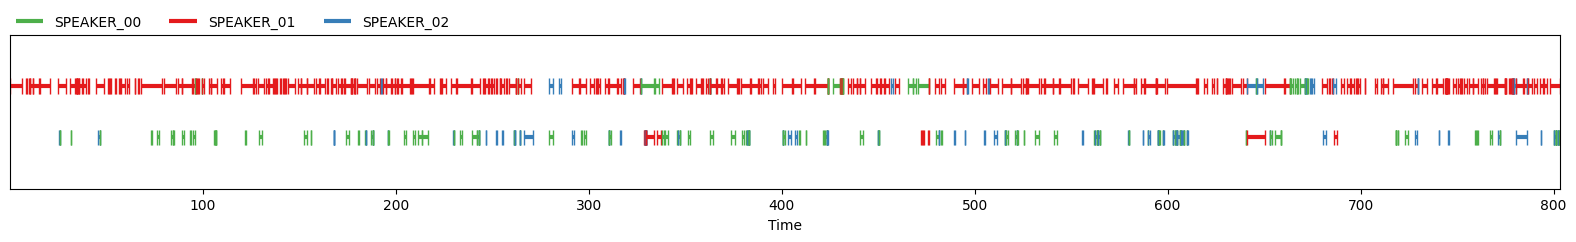

In [ ]:
diarization

In [ ]:
import whisper
model = whisper.load_model("medium")

100%|█████████████████████████████████████| 1.42G/1.42G [00:22<00:00, 67.8MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [ ]:
from pyannote.audio import Audio
import numpy as np
from pyannote.core.segment import Segment

audio_file = path
audio = Audio(sample_rate=16000, mono=True)

duration = audio.get_duration(audio_file)

import csv
with open("/content/drive/MyDrive/DataScience/result.csv", 'w') as csv_file:

  writer = csv.writer(csv_file)
  writer.writerow(['start', 'end', 'speaker', 'text'])

  for segment, _, speaker in diarization.itertracks(yield_label=True):
      start = max(0, segment.start)
      end = min(segment.end, duration)
      seg = Segment(start = start, end = end)
      waveform, sample_rate = audio.crop(audio_file, seg)
      cropped_audio = waveform.squeeze().numpy()
      result = model.transcribe(np.average(cropped_audio, axis=0), language="ja")
      text = result["text"]
      print(f"[{segment.start:03.1f}s - {segment.end:03.1f}s] {speaker}: {text}")
      writer.writerow([start, end, speaker.encode("utf-8"), text.encode("utf-8")])


[0.0s - 6.2s] SPEAKER_01: 音量調整したけど、視聴者さん側にも念のため聞いてもらおうかしましょう了解
[8.2s - 8.7s] SPEAKER_01: だれ?
[10.0s - 10.5s] SPEAKER_01: あ、だ…
[10.6s - 11.8s] SPEAKER_01: お待たせ!まった!
[12.0s - 15.2s] SPEAKER_01: 2次参事所属公式美少女連輪試合場の
[15.4s - 20.7s] SPEAKER_01: アンジュ!カトリーナだ!よろしくお願いしまーすこんな感じなんだっけ、コラボの時
[25.1s - 29.2s] SPEAKER_01: 裏では元気ないみたいなそんなことない
[25.7s - 26.0s] SPEAKER_02: 裏返し
[26.0s - 26.1s] SPEAKER_00: ご視聴ありがとうございました!
[31.4s - 33.5s] SPEAKER_01: ちょっとお腹痛めてたなって思って
[31.5s - 31.8s] SPEAKER_00: 
[34.4s - 34.7s] SPEAKER_01: ご視聴ありがとうございました
[34.7s - 34.8s] SPEAKER_01: 
[35.4s - 35.8s] SPEAKER_01: 
[36.0s - 37.2s] SPEAKER_01: 鳥臓水食べてる
[38.1s - 39.3s] SPEAKER_01: 無事ならいいんだ
[40.4s - 40.9s] SPEAKER_01: どうぞ
[44.4s - 49.0s] SPEAKER_01: 毎度ヘルスタの北大二公女リゼ・ヘルスタです よろしくお願いします
[45.5s - 46.8s] SPEAKER_02: ヘルスターは食材に
[46.8s - 46.9s] SPEAKER_00: ご視聴ありがとうございました!
[50.9s - 51.5s] SPEAKER_01: 
[51.8s - 52.3s] SPEAKER_01: こっちを?
[54.4s - 55.2s] SPEAKER_01: 誰か映ってんなw
[56.4s - 57.2s] SPEAKER_01: 誰か格が
[57.7s - 59.7s] SPEAKER_01: ドアが映してしまった
[60.